In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
census = pd.read_csv('Census.csv', delimiter=',')
census

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Employment Category,Final Salary,Household Occupancy,Home Type
0,0,1,Daisy Court,Marion,Gilbert,81,Head,Widowed,Female,"Retired Education officer, museum",None,Intramystical,80-84,Retired,24883,1,Non-Family
1,1,1,Aprilcurl Street,Mandy,Moore,54,Head,Divorced,Female,"Nurse, learning disability",None,Intramystical,50-54,Employed,28649,1,Non-Family
2,2,1,Arch Avenue,Ashleigh,Begum,61,Head,Single,Female,Health service manager,None,Utheism,60-64,Employed,46729,1,Non-Family
3,3,1,Armagh Forges,Daniel,Carr,56,Head,Married,Male,Horticultural consultant,None,Intramystical,55-59,Employed,35457,2,Non-Family
4,4,1,Armagh Forges,Janet,Carr,57,Wife,Married,Female,Hydrologist,None,None,55-59,Employed,40271,2,Family Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,7450,245,Laurel Avenue,Howard,Thomas-Osborne,14,Son,NaN,Male,Student,None,NaN,10-14,Student (Child),0,5,Family Home
7451,7451,245,Laurel Avenue,Danielle,Thomas-Osborne,19,Daughter,Single,Female,University Student,None,None,15-19,Student,0,5,Family Home
7452,7452,245,Laurel Avenue,Nigel,Osborne,21,Son,Single,Male,University Student,None,None,20-24,Student,0,5,Family Home
7453,7453,245,Laurel Avenue,Beth,Osborne,56,Head,Married,Female,"Designer, textile",None,None,55-59,Employed,29110,5,Non-Family


In [38]:
totalpopulation = len(census)

## Crude Birth Rate

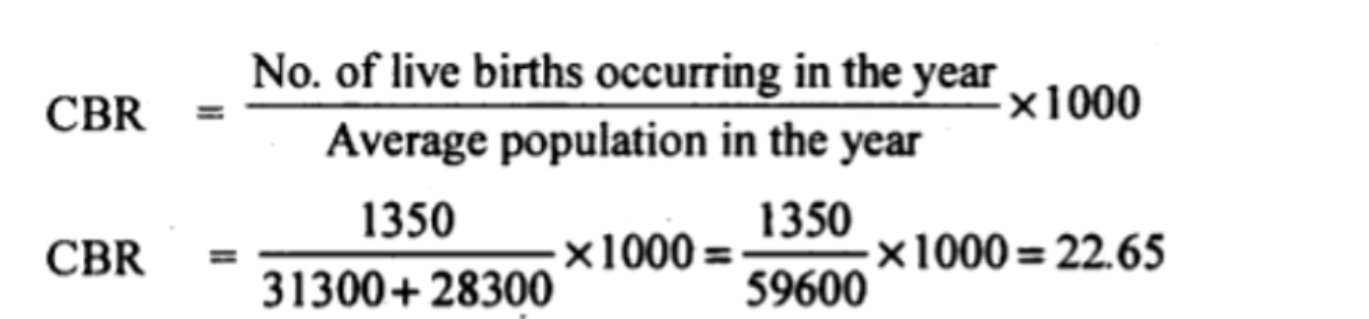

In [69]:
livebirths = len(census[census['Age'] == 0])
crudebirthrate = (livebirths/totalpopulation)*1000
crudebirthrate

10.731052984574111

In [39]:
# same method - different filtering... (by variable)

babies0 = census['Age'] == 0
babies4 = census['Age'] == 4
babies8 = census['Age'] == 8


crudebr = (len(census[babies0])/totalpopulation)*1000 

crudebr4year = (len(census[babies4])/len(census))*1000

print(f"Present Crude Birthrate per 1000: {crudebr}")
print(f"Previous Crude Birthrate per 1000: {crudebr4year}")


print(f"Present CBR Change from Previous per 1000: {crudebr-crudebr4year}")


Present Crude Birthrate per 1000: 10.731052984574111
Previous Crude Birthrate per 1000: 12.743125419181759
Present CBR Change from Previous per 1000: -2.0120724346076475


## Age Specific Fertility Rate

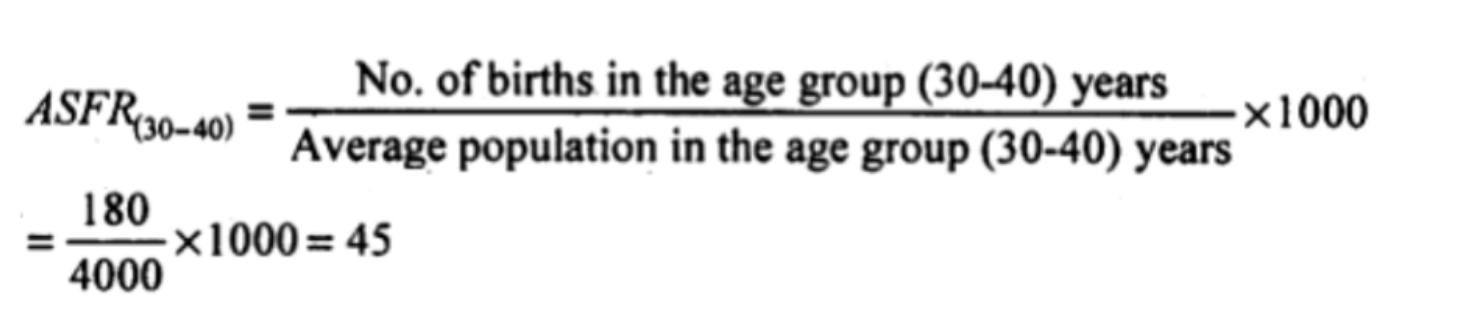

In [73]:
births2529 = len(census[census['Age'] == 0])
age2529 = (census['Age'].between(25,29)) & (census['Gender'] == 'Female')
age2529 = len(census[age2529])

print((births2529/age2529)*1000)

293.0402930402931


In [76]:
# define women of childbearing age, corresponding to above year gaps

age2529 = (census['Age'].between(25,29)) & (census['Gender'] == 'Female')
age3034 = (census['Age'].between(30,34)) & (census['Gender'] == 'Female')
age3540 = (census['Age'].between(35,39)) & (census['Gender'] == 'Female')

# calculate age-specific fertility rate

asfr252 = (len(census[babies0])/len(census[age2529]))*1000
asfr3034 = (len(census[babies4])/len(census[age3034]))*1000
asfr3540 = (len(census[babies8])/len(census[age3540]))*1000

print(f"ASFR 25-29 per 1000 {asfr2529}")
print(f"ASFR 30-34 per 1000 {asfr3034}")
print(f"ASFR 35-40 per 1000 {asfr3540}")

ASFR 25-29 per 1000 293.0402930402931
ASFR 30-34 per 1000 299.6845425867508
ASFR 35-40 per 1000 255.3846153846154


## General Fertility Rate

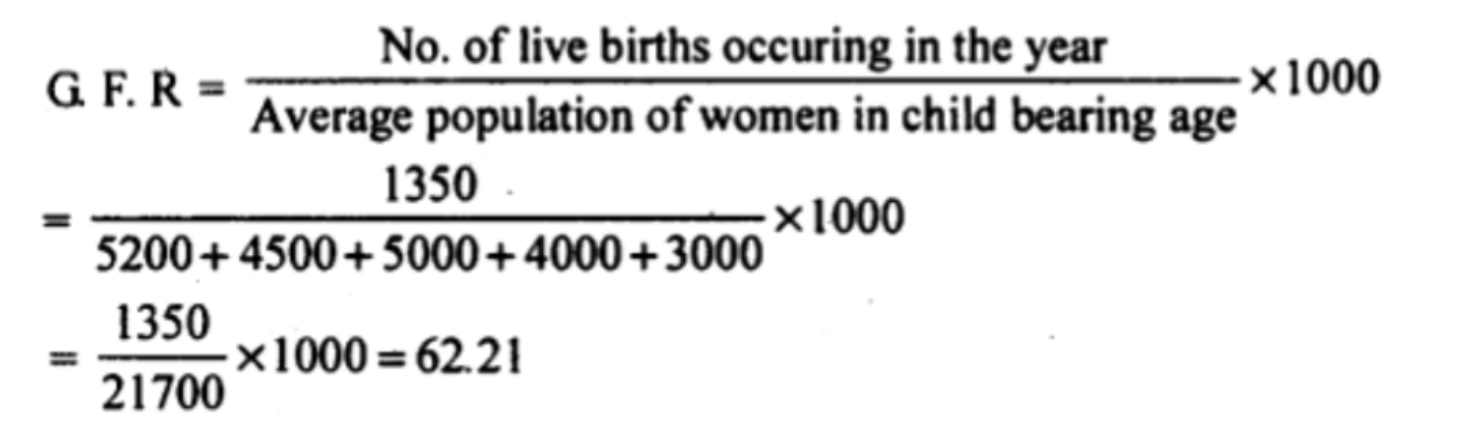

In [19]:
totalbirths = len(census[babies0]) +  len(census[babies4]) + len(census[babies8])
cbage = len(census[age2529])+ len(census[age3034])+len(census[age3540])

gfr = totalbirths/cbage

print(f"General Fertility Rate: {gfr*1000}")

General Fertility Rate: 281.9672131147541


## Crude Death Rate

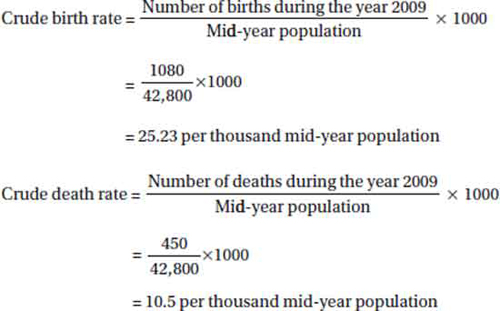

In [49]:
agingpop = census[census['Age'].between(65,99)].groupby('Age').size().sort_index(ascending=False)
agingpop

Age
99     1
97     3
96     3
95     3
94     2
93     3
92     5
91     3
90     9
89     7
88    14
87    14
86     9
85    12
84    21
83    18
82    21
81    23
80    29
79    22
78    24
77    30
76    32
75    43
74    39
73    45
72    41
71    43
70    37
69    56
68    59
67    50
66    52
65    50
dtype: int64

In [50]:
# shift the ages up one to mimic last year's 'counts' per age

calculatedages = agingpop.shift(-1)
calculatedages

Age
99     3.0
97     3.0
96     3.0
95     2.0
94     3.0
93     5.0
92     3.0
91     9.0
90     7.0
89    14.0
88    14.0
87     9.0
86    12.0
85    21.0
84    18.0
83    21.0
82    23.0
81    29.0
80    22.0
79    24.0
78    30.0
77    32.0
76    43.0
75    39.0
74    45.0
73    41.0
72    43.0
71    37.0
70    56.0
69    59.0
68    50.0
67    52.0
66    50.0
65     NaN
dtype: float64

In [54]:
# calculate the difference between our two sets

diff = agingpop - calculatedages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
0,99,-2.0
4,94,-1.0
5,93,-2.0
7,91,-6.0
9,89,-7.0
12,86,-3.0
13,85,-9.0
15,83,-3.0
16,82,-2.0
17,81,-6.0


In [56]:
deathrate = abs(((deaths['Count']).sum())/totalpopulation)*1000
deathrate

12.608987256874581

## Crude Growth Rate
Simple enough - birth rate and death rate...

In [61]:
print(f"CGR {crudebr - deathrate}")
print(f"CGR as Percentage {(crudebr-deathrate)/10}%")

CGR -1.87793427230047
CGR as Percentage -0.187793427230047%


## Population Change

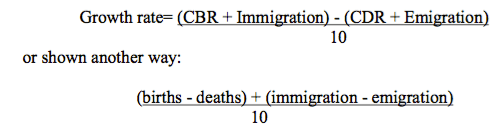

Division by ten for percentage, another method:


Crude Birth Rate - Crude Death Rate = Crude Growth Rate

(birth rate + immigration rate) - (death rate + emigration rate) = population change

Crude immigration and emigration rates can be calculating using the same method of other crude rates - count the number of potential emigrants/immigrants and divide by the total population, * 1000 to get the crude rate.

In [81]:
# brief method to show occupancy rates

householdoccs = census.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
householdoccs

,House Number,Street,Occupancy Count
0,1,Aprilcurl Street,1
1,1,Arch Avenue,1
2,1,Armagh Forges,2
3,1,Ashton Land,3
4,1,Bailey House,8
...,...,...,...
2732,241,Laurel Avenue,3
2733,242,Laurel Avenue,2
2734,243,Laurel Avenue,6
2735,244,Laurel Avenue,5
